###Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

Here’s an example of what this means:

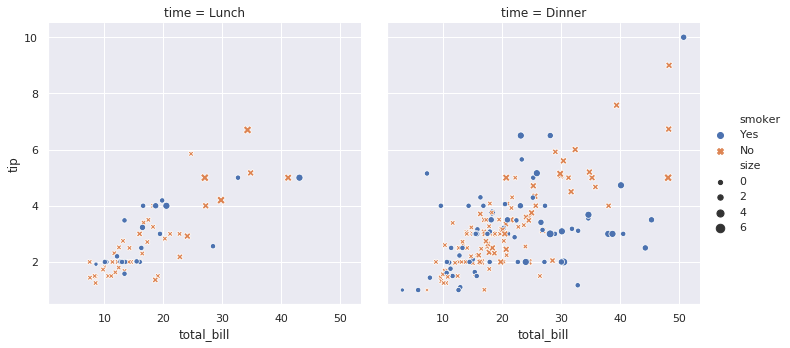

In [2]:
import seaborn as sns #We import seaborn, which is the only library necessary for this simple example.


sns.set()     #We apply the default default seaborn theme, scaling, and color palette.
tips = sns.load_dataset("tips")      #We load one of the example datasets.
sns.relplot(x="total_bill", y="tip", col="time",     #We draw a faceted scatter plot with multiple semantic variables.
            hue="smoker", style="smoker", size="size",
            data=tips);

###The function relplot() is named that way because it is designed to visualize many different statistical relationships. While scatter plots are a highly effective way of doing this, relationships where one variable represents a measure of time are better represented by a line. The relplot() function has a convenient kind parameter to let you easily switch to this alternate representation:

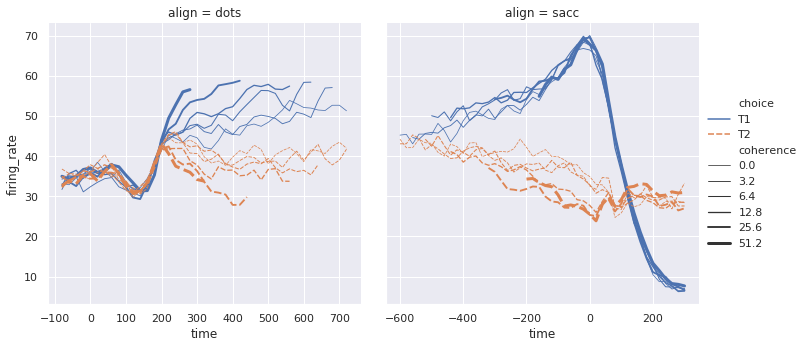

In [3]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

###Often we are interested in the average value of one variable as a function of other variables. Many seaborn functions can automatically perform the statistical estimation that is neccesary to answer these questions:

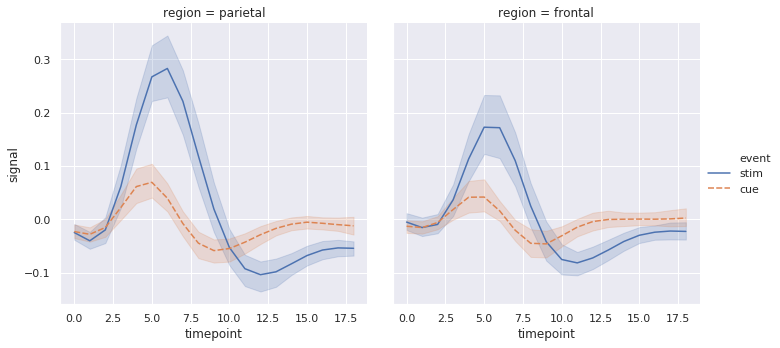

In [4]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

###Statistical estimation in seaborn goes beyond descriptive statisitics. For example, it is also possible to enhance a scatterplot to include a linear regression model (and its uncertainty) using lmplot():

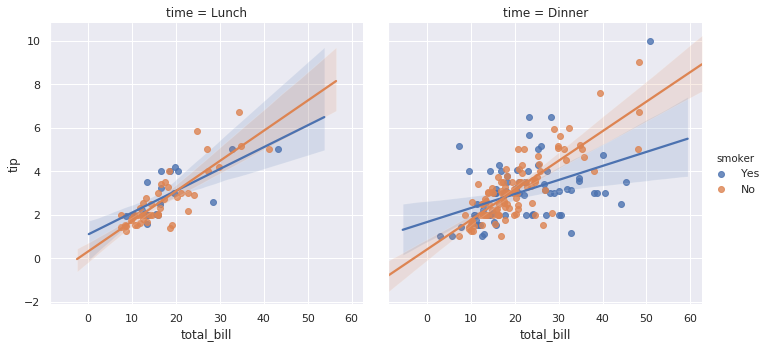

In [5]:
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",
           data=tips);

###Standard scatter and line plots visualize relationships between numerical variables, but many data analyses involve categorical variables. There are several specialized plot types in seaborn that are optimized for visualizing this kind of data. They can be accessed through catplot(). Similar to relplot(), the idea of catplot() is that it exposes a common dataset-oriented API that generalizes over different representations of the relationship between one numeric variable and one (or more) categorical variables.

These representations offer different levels of granularity in their presentation of the underlying data. At the finest level, you may wish to see every observation by drawing a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap:

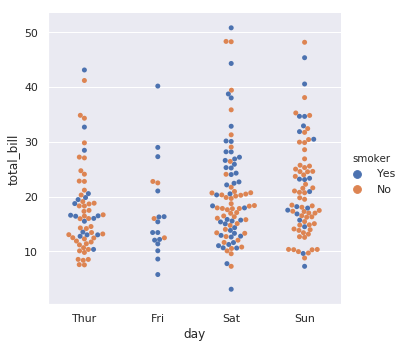

In [6]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", data=tips);

Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from:



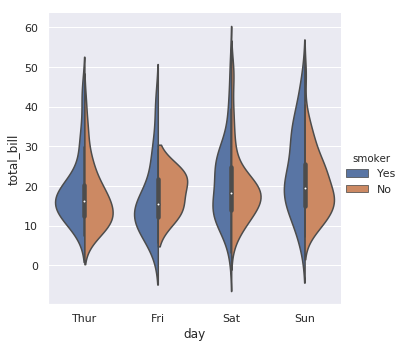

In [7]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);


Or you could show the only mean value and its confidence interval within each nested category:



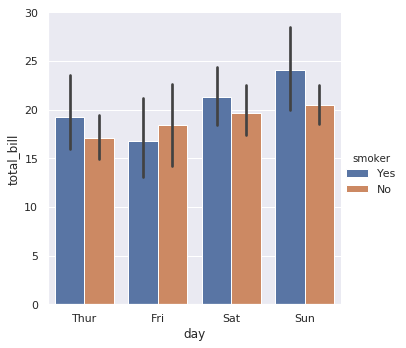

In [8]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="bar", data=tips);

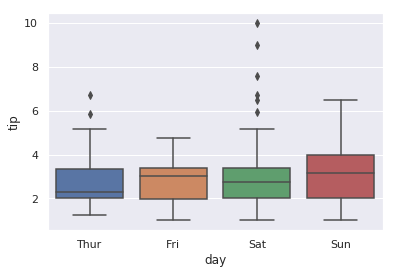

In [9]:
import matplotlib.pyplot as plt
# f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=tips)


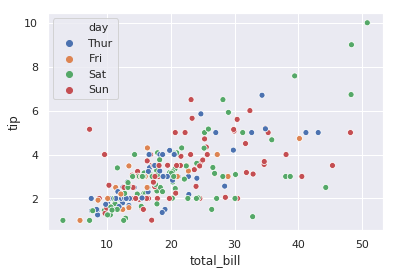

In [10]:
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips);

How do these tools work? It’s important to know about a major distinction between seaborn plotting functions. All of the plots shown so far have been made with “figure-level” functions. These are optimized for exploratory analysis because they set up the matplotlib figure containing the plot(s) and make it easy to spread out the visualization across multiple axes. They also handle some tricky business like putting the legend outside the axes. To do these things, they use a seaborn FacetGrid.

Each different figure-level plot kind combines a particular “axes-level” function with the FacetGrid object. For example, the scatter plots are drawn using the scatterplot() function, and the bar plots are drawn using the barplot() function. These functions are called “axes-level” because they draw onto a single matplotlib axes and don’t otherwise affect the rest of the figure.

The upshot is that the figure-level function needs to control the figure it lives in, while axes-level functions can be combined into a more complex matplotlib figure with other axes that may or may not have seaborn plots on them:

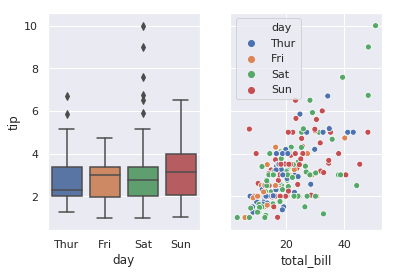

In [11]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=tips, ax=axes[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1]);

Controling the size of the figure-level functions works a little bit differently than it does for other matplotlib figures. Instead of setting the overall figure size, the figure-level functions are parameterized by the size of each facet. And instead of setting the height and width of each facet, you control the height and aspect ratio (ratio of width to height). This parameterization makes it easy to control the size of the graphic without thinking about exactly how many rows and columns it will have, although it can be a source of confusion:

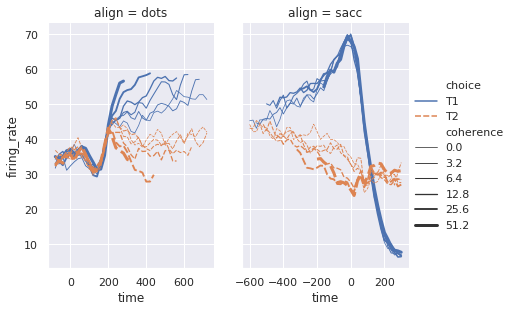

In [12]:
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            height=4.5, aspect=2 / 3,
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

###There are two other kinds of figure-level functions in seaborn that can be used to make visualizations with multiple plots. They are each oriented towards illuminating the structure of a dataset. One, jointplot(), focuses on a single relationship:

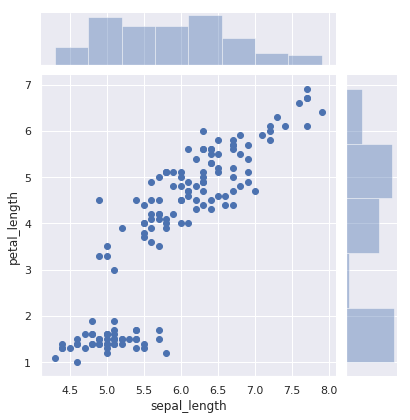

In [13]:
iris = sns.load_dataset("iris")
sns.jointplot(x="sepal_length", y="petal_length", data=iris);

The other, pairplot(), takes a broader view, showing all pairwise relationships and the marginal distributions, optionally conditioned on a categorical variable :

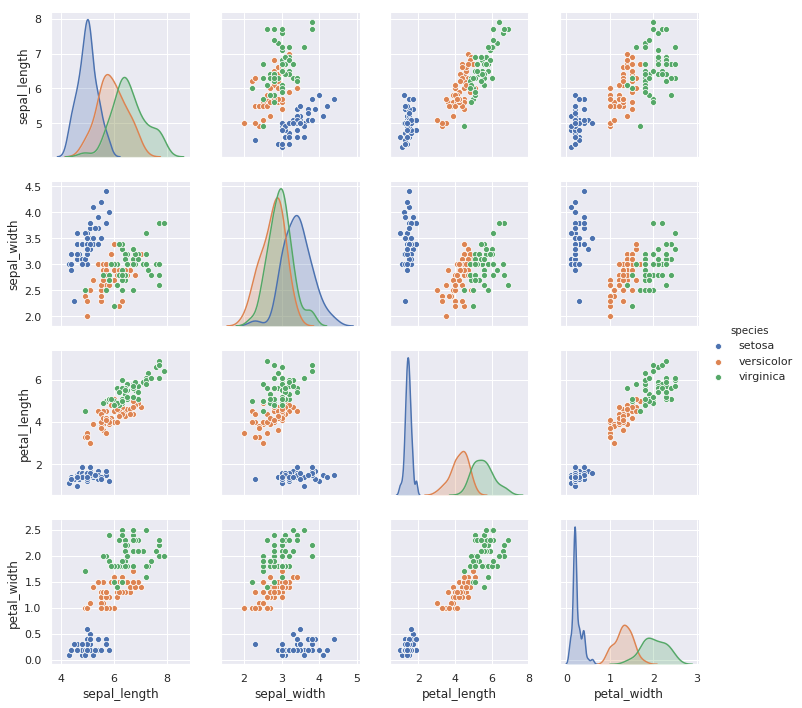

In [14]:
sns.pairplot(data=iris, hue="species");

The plotting functions try to use good default aesthetics and add informative labels so that their output is immediately useful. But defaults can only go so far, and creating a fully-polished custom plot will require additional steps. Several levels of additional customization are possible.

The first way is to use one of the alternate seaborn themes to give your plots a different look. Setting a different theme or color palette will make it take effect for all plots:

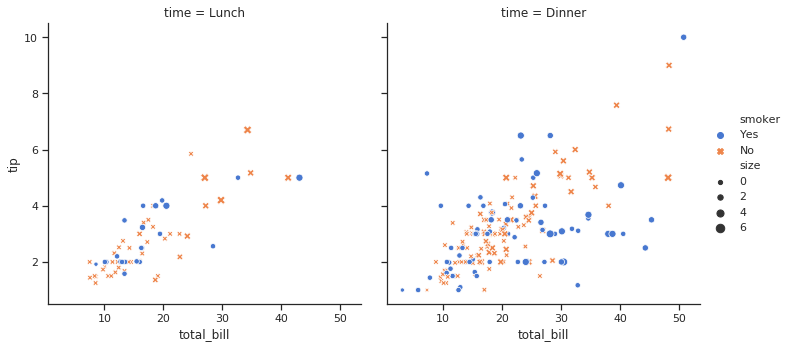

In [15]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

For figure-specific customization, all seaborn functions accept a number of optional parameters for switching to non-default semantic mappings, such as different colors. (Appropriate use of color is critical for effective data visualization, and seaborn has extensive support for customizing color palettes).

Finally, where there is a direct correspondence with an underlying matplotlib function (like scatterplot() and plt.scatter), additional keyword arguments will be passed through to the matplotlib layer:

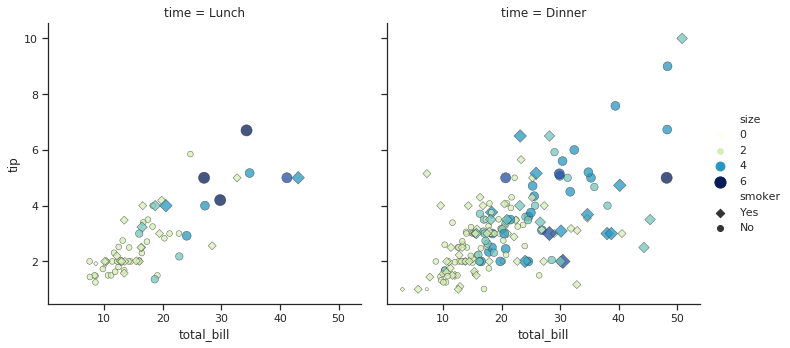

In [16]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="size", style="smoker", size="size",
            palette="YlGnBu", markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75,
            data=tips);

In the case of relplot() and other figure-level functions, that means there are a few levels of indirection because relplot() passes its exta keyword arguments to the underlying seaborn axes-level function, which passes its extra keyword arguments to the underlying matplotlib function. So it might take some effort to find the right documentation for the parameters you’ll need to use, but in principle an extremely high level of customization is possible.

Some customization of figure-level functions can be accomplished through additional parameters that get passed to FacetGrid, and you can use the methods on that object to control many other properties of the figure. For even more tweaking, you can access the matplotlib objects that the plot is drawn onto, which are stored as attributes:

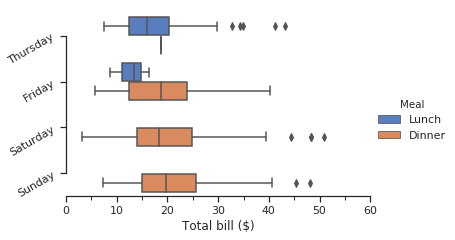

In [17]:
g = sns.catplot(x="total_bill", y="day", hue="time",
                height=3.5, aspect=1.5,
                kind="box", legend=False, data=tips);
g.add_legend(title="Meal")
g.set_axis_labels("Total bill ($)", "")
g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
g.despine(trim=True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
plt.setp(g.ax.get_yticklabels(), rotation=30);